<p alingn="right"> para execução deste notebook, são necessárias as bibliotecas [pandas](http://pandas.pydata.org/), [cufflinks](https://github.com/santosjorge/cufflinks) e [seaborn](https://seaborn.pydata.org/index.html)</p>

In [1]:
%matplotlib inline
import cufflinks as cf
import pandas as pd
cf.go_offline()
from collections import OrderedDict
from IPython.display import display
import statsmodels.api as sm

import seaborn as sns


 
# <Center> Trabalho Prático 3 </center>

### <Center> Estatística e Econometria - Mestrado Profissional em Macroeconomia e Finanças <br><br> Prof.: Marcelo C. Medeiros <br> Mon.: Pedro Américo <br><br> Data de Entrega: 30/06/2017, no início da monitoria

##### Pablo Corrêa Fonseca <br> Paulo Castor de Castro




O objetivo deste trabalho é estimar os impactos econômicos de escolaridade (retornos da
educação), ou seja, os efeitos de um ano a mais de escolaridade no salário médio dos indivíduos.
Para tal, será utilizado o artigo “Using Geographic Variation in College Proximity to Estimate
the Return to Schooling” de David Card, publicado como
Card, David (1995). “Using Geographic Variation in College Proximity to Estimate the Return
to Schooling”. In L.N. Christofides, E.K. Grant, and R. Swidinsky, editors, Aspects of Labor
Market Behaviour: Essays in Honour of John Vanderkamp. Toronto: University of Toronto
Press.
Para realização do trabalho você irá utilizar os dados na planilha [card.xlsx.](card.xlsx) Cada variável está
descrita no arquivo [code_bk.txt.](code_bk.txt)

1. Descreva brevemente os problemas mais importantes para a estimação do retorno da educação,
focando principalmente na endogeneidade da variável escolaridade. Use no máximo
uma página para discussão.

2. Faça um breve resumo do artigo que serviu de base para o trabalho dando atenção especial
aos métodos econométricos utilizados.


In [2]:
data = pd.read_excel('card.xlsx', index_col='id', na_values='Na').apply(pd.to_numeric, errors='ignore').reset_index(drop=True)
data_vars = ['educ','exper','expersq', 'fatheduc', 'motheduc', 'black','south','smsa', 'reg661', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669', 'smsa66', 'momdad14', 'sinmom14']
data.loc[:,data_vars[5:]] = data.loc[:,data_vars[5:]].applymap(int)

3 - Apresente estatísticas descritivas e histogramas para as seguintes variáveis: educ, lwage,
exper.


In [3]:
data[['educ','lwage','exper']].describe().T.style

In [4]:
data[['educ','lwage','exper']].iplot(kind='histogram', subplots=True, subplot_titles = ('Educ','Lwage', 'Exper'))

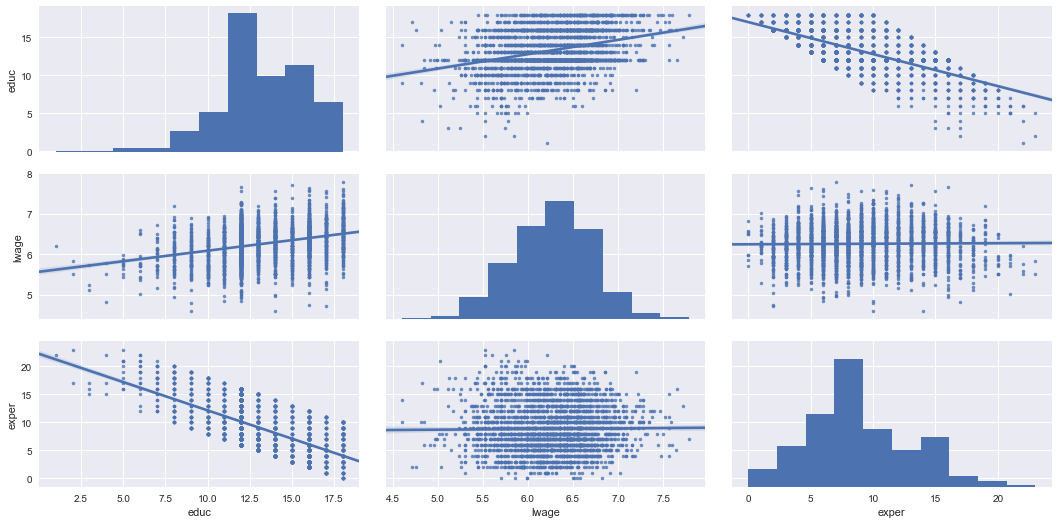

In [5]:
sns.pairplot(data, vars=['educ', 'lwage', 'exper'], kind='reg', markers='.', size=2.5, aspect = 2)

4 - Estime um modelo de regressão linear simples onde a variável dependente é lwage e a
variável explicativa é educ (inclua uma constante no modelo). Como podemos interpretar
tal modelo? Como você poderia testar a hipótese nula que o impacto de educ em lwage
é zero? Apresente todos os detalhes do teste. Qual a relação deste teste com os testes de
hipóteses estudados na aula? O coeficiente de educ é significante estatisticamente? Qual é o
R2 do modelo ajustado e como devemos interpretá-lo? Esta regressão estimada representa
uma relação causal?


Modelo de regressão:

$ l = const+ \beta educ  +  \epsilon$ 



In [6]:
y = data.lwage
x = sm.add_constant(data.educ) # adciona a constante
f = sm.OLS(y,x).fit(use_t=True)
print(f.summary())
print('\nt statistics:')
print(f.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     329.5
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           5.77e-70
Time:                        01:29:24   Log-Likelihood:                -1668.8
No. Observations:                3010   AIC:                             3342.
Df Residuals:                    3008   BIC:                             3354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5709      0.039    143.470      0.0

A Hipótese de que educ não afeta lwage pode ser testada da seguinte forma:
<p/>
<div>
    <div class='row'>
        <div class='col-xs-2'>
            <p>
                \begin{align}
                \begin{cases}
                H_0: \beta = 0\\
                H_a: \beta \neq 0
                \end{cases}
                \end{align}
            </p>
        </div>
        <div class='col-xs-3'>
            <p/>
            com a estatística  de teste t, e significancia 5%
        </div>
        <div class='col-xs-5'>
            $$ t = \frac{\hat\beta - \beta}{\frac{s}{\sqrt{n}}}  \sim t\_student_{n-1}$$
        </div>
    </div>
    <div class='row'>
    <p class='col-md-8'>
    O coeficiente $\beta$ encontrado, não é significante estatisticamente, pois o seu p-valor é muito baixo. 
    O valor encontrado para $R^2$ também é baixo, o que indica que mais variáveis devem impactar lwage além de educ,
    por fim comparando os demais resultados da tabela acima, não espera-se que esta regressão represente uma relação causal.
    </p>
    </div>
</div>

5 - Estime as regressões apresentadas na Tabela 2 do artigo e comente os resultados (os seus
resultados podem diferir um pouco dos apresentados no artigo devido à pequenas diferenças
nos dados).

In [7]:
x = data[data_vars]
x = sm.add_constant(x).dropna()#.fillna(x.mean())
y = data.lwage.reindex(x.index)
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     44.03
Date:                Tue, 04 Jul 2017   Prob (F-statistic):          1.20e-138
Time:                        01:29:24   Log-Likelihood:                -967.69
No. Observations:                2220   AIC:                             1975.
Df Residuals:                    2200   BIC:                             2089.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0755      0.079     51.732      0.0

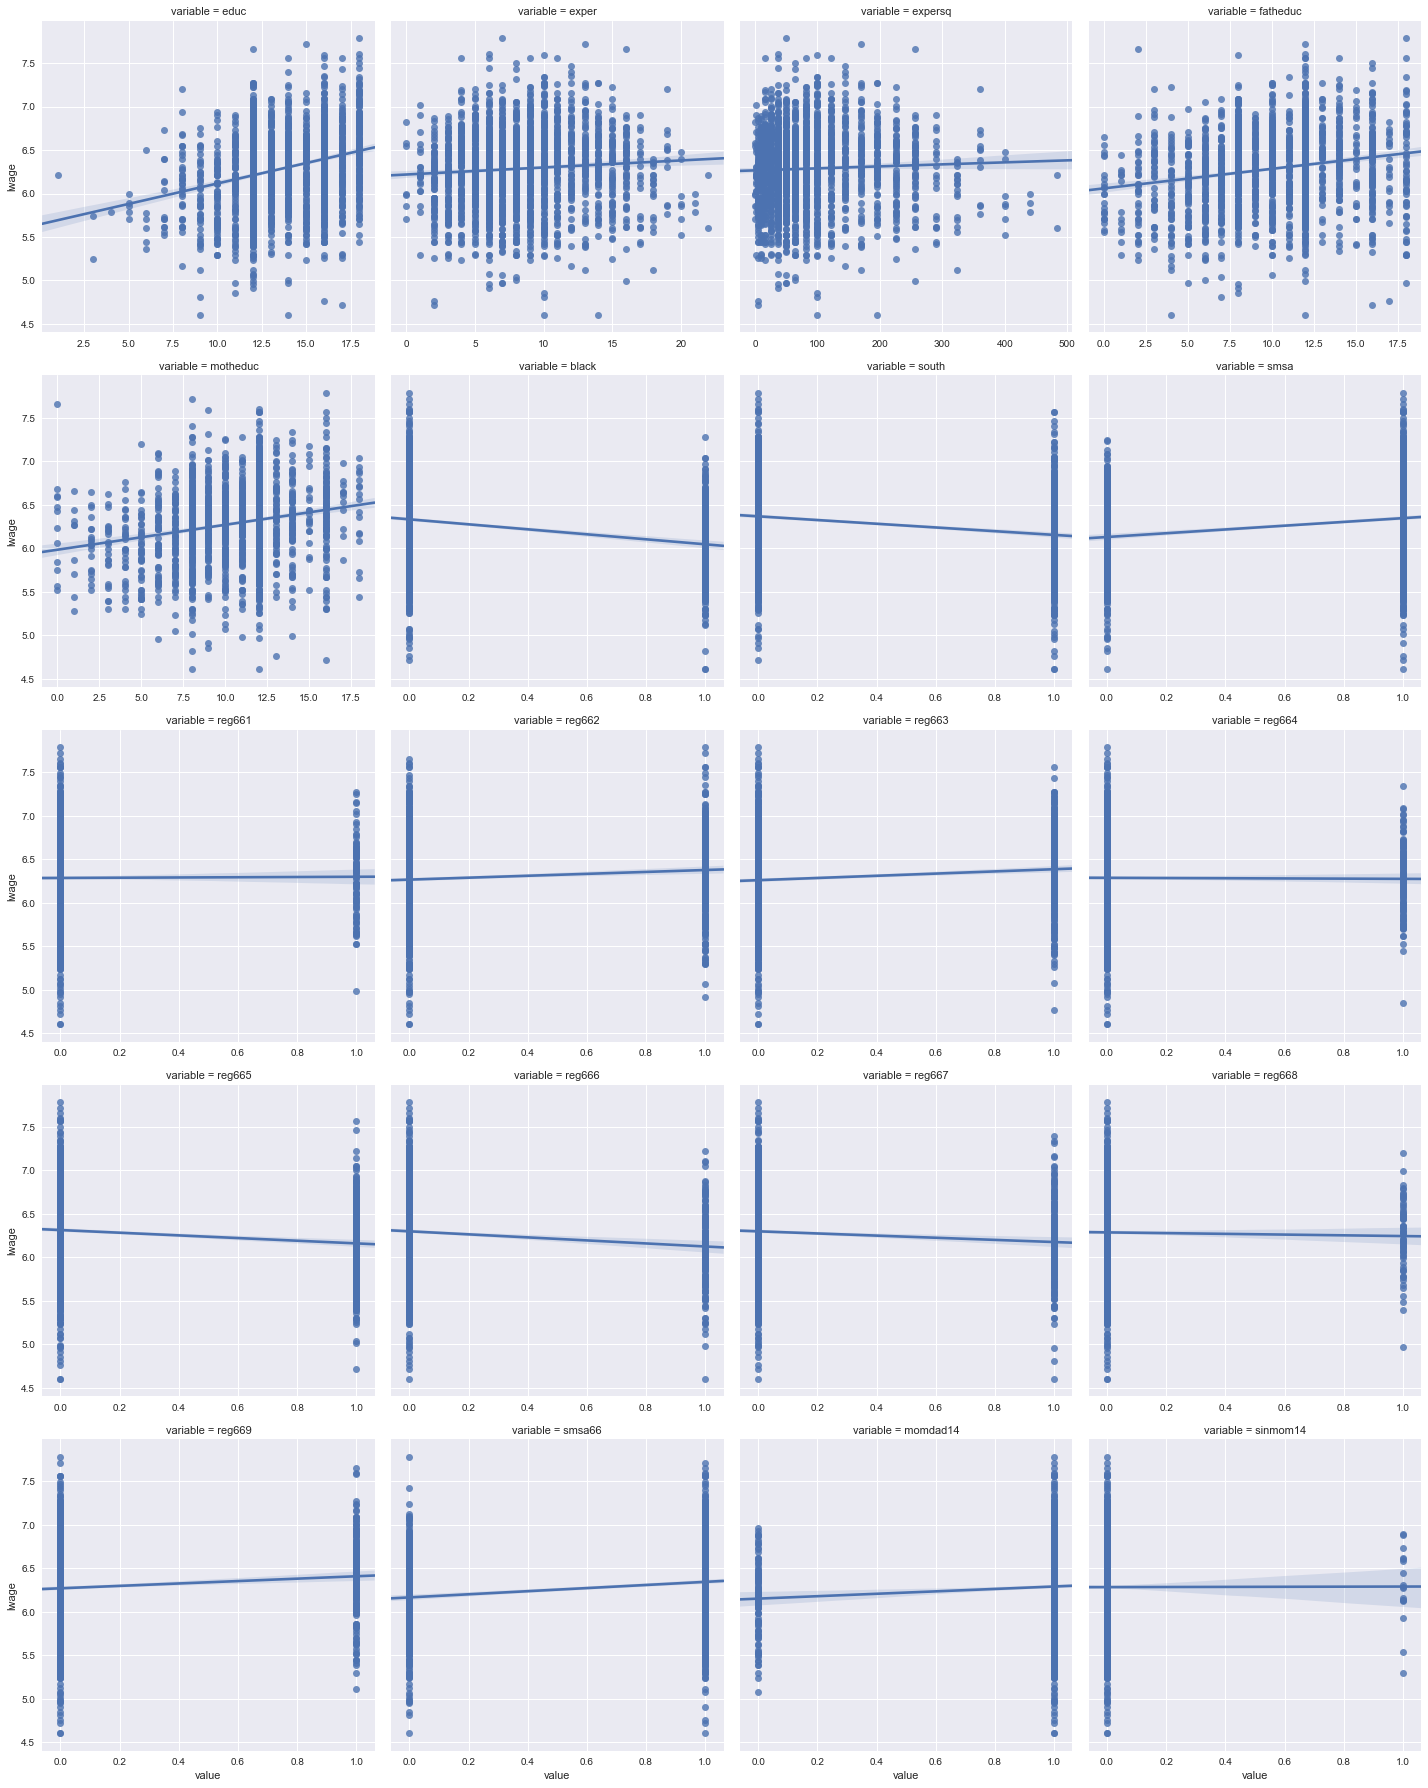

In [8]:
sns.lmplot('value','lwage',data=pd.melt(data.reindex(x.index)[data_vars + ['lwage']], id_vars='lwage'), col='variable', col_wrap=4, sharex=False, sharey=True)

A Introdução de mais variáveis aumentou $R^2$ consideravelmente, estando o valor próximo a tabela 2 do artigo ~0.291, o que confirma as suspeitas do item anterior, de que mais variáveis explicam a variação de renda. <br>
Os coeficientes obtidos com a regressão mostrada na tabela anterior são bem próximos aos obtidos pelo autor.

**6 - Explique porque habilidade, que é um fator não observado, pode atrapalhar as estimativas
dos retornos da educação? Como as variáveis iq e kww (que representam testes de habilidade)
poderiam ser utilizadas de forma a reduzir o problema? Estime um modelo de
regressão usando tais variáveis e comente os resultados.**

A habilidade, por ser um fator não observado, não pode ser regredida diretamente. Contudo seu efeito sobre a renda está contido no erro residual da regressão.
Podemos usar iq e kww como proxies para a habilidade, removendo assim do erro residual (explicando) parte do efeito da habilidade sobre a renda


In [9]:
x = data[['educ'] + ['kww', 'iq']].dropna()
x = sm.add_constant(x).dropna()
y = data.lwage.reindex(x.index)
print(sm.OLS(y,x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     102.1
Date:                Tue, 04 Jul 2017   Prob (F-statistic):           1.38e-61
Time:                        01:29:38   Log-Likelihood:                -970.56
No. Observations:                2040   AIC:                             1949.
Df Residuals:                    2036   BIC:                             1972.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4195      0.065     83.054      0.0

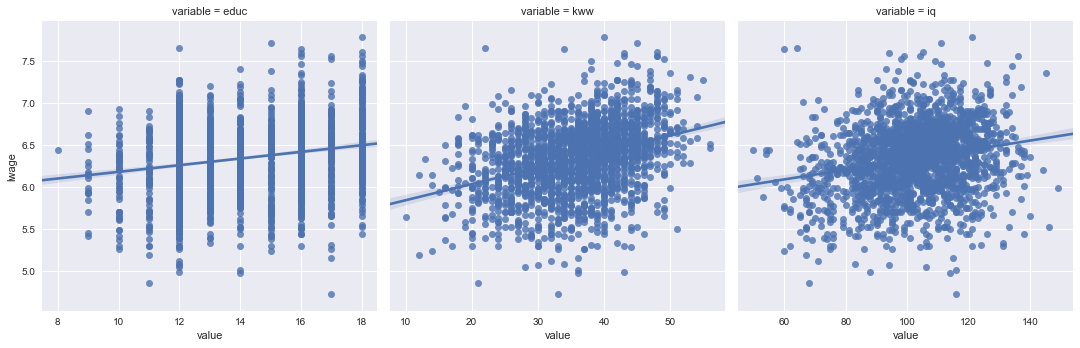

In [10]:
sns.lmplot('value','lwage',data=pd.melt(data.reindex(x.index)[['educ','kww','iq','lwage']], id_vars='lwage'), col='variable', col_wrap=4, sharex=False, sharey=True)

**7- Queremos agora utilizar a variável nearc4 (se a pessoa morava perto de uma universidade
em 1966) como um instrumento para educação. Explique as condições que esta variável
deve cumprir para servir de instrumento. **

nearc4 deve estar correlacionada com educação, e não estar correlacionada com o erro residual.

**8 - Descreva o estimador de mínimos quadrados em dois estágios e qual a principal diferença
para o estimador de mínimos quadrados ordinários. **

No primeiro estágio estimamos a variável educ regredida no instrumento, no segundo fazemos a regressão com a variável instrumentada, desta forma, atendidas as condições para servir de instrumento, o efeito de educação em renda será causal.

**9 - Agora vamos testar se o primeiro estágio funciona, estime o primeiro estágio regredindo
educ em nearc4 e todas as outras variáveis exógenas incluídas no modelo de regressão.
Reporte a estatística F do primeiro estágio e discuta os resultados.**

In [11]:
x = data['nearc4']
#x = sm.add_constant(x)
y = data.educ.reindex(x.index)
 # adciona a constante alpha
model = sm.OLS(y,x)
results = model.fit(cov_type='HC0')
print(results.summary())
print('\nt statistics:')
print(f.pvalues)

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                 5.644e+04
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:29:40   Log-Likelihood:                -10389.
No. Observations:                3010   AIC:                         2.078e+04
Df Residuals:                    3009   BIC:                         2.079e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
nearc4        13.5270      0.057    237.578      0.0

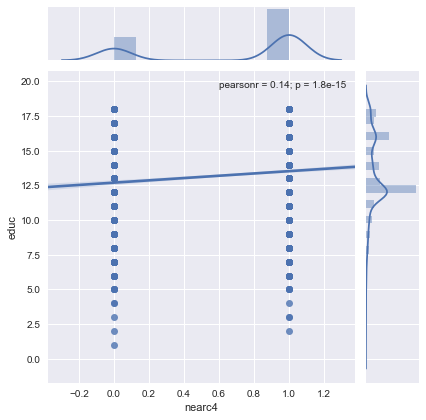

In [12]:
sns.jointplot('nearc4','educ', data, kind='reg')

**10 -  Agora estime o modelo por mínimos quadrados em dois estágios usando nearc4 como instrumento
para educ. Compare o coeficiente de educação da estimação com os resultados
anteriores. O que você pode concluir a partir deste experimento? **



In [13]:
educ_iv = pd.Series(results.predict(), index=x.index, name='educ_iv') 
y = data.lwage.reindex(educ_iv.index)
iv_x = educ_iv#sm.add_constant(educ_iv) # adciona a constante alpha
f = sm.OLS(y,iv_x).fit(use_t=True)
print(f.summary())
print('\nt statistics:')
print(f.tvalues)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     6680.
Date:                Tue, 04 Jul 2017   Prob (F-statistic):               0.00
Time:                        01:29:41   Log-Likelihood:                -8040.4
No. Observations:                3010   AIC:                         1.608e+04
Df Residuals:                    3009   BIC:                         1.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ_iv        0.4666      0.006     81.731      0.0

Ao utililzar nearc4 como um instrumento para educação, o poder explicativo da variável educ aumenta significativamente, como pode ser visto na tabela resumo acima.